## Дерево решений (задача классификации)

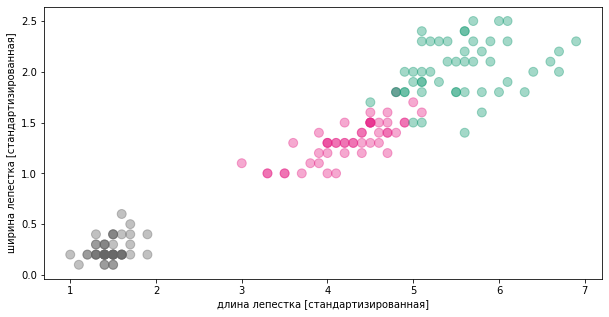

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz


ds_iris = load_iris()
X = ds_iris.data[:,[2,3]]
y = ds_iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], 
            c=ds_iris.target, cmap='Dark2_r', s=80, alpha=0.4)
plt.xlabel('длина лепестка [стандартизированная]')
plt.ylabel('ширина лепестка [стандартизированная]')
plt.show()

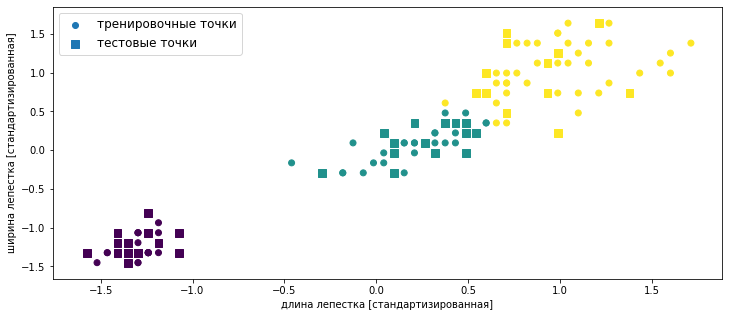

In [2]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree_model = tree.fit(X_train, y_train)
y_test_pred = tree_model.predict(X_test)
y_train_pred = tree_model.predict(X_train)
plt.figure(figsize=(12,5))
plt.scatter(X_train_std[:,0], X_train_std[:,1], 
            c=y_train_pred, marker='o', label='тренировочные точки')
plt.scatter(X_test_std[:,0], X_test_std[:,1], 
            c=y_test_pred, marker='s', s=60, label='тестовые точки')

plt.xlabel('длина лепестка [стандартизированная]')
plt.ylabel('ширина лепестка [стандартизированная]')
plt.legend(loc='upper left', prop={'size': 12})
plt.show()

In [3]:
print('Accuracy train_data: %.3f' % accuracy_score(y_train, y_train_pred))
print('Accuracy test_data: %.3f' % accuracy_score(y_test, y_test_pred))

Accuracy train_data: 0.981
Accuracy test_data: 0.978


In [4]:
export_graphviz(tree, out_file= 'tree.dot', feature_names=['petal length', 'petal width'])

## Случайный лес (задача классификации)

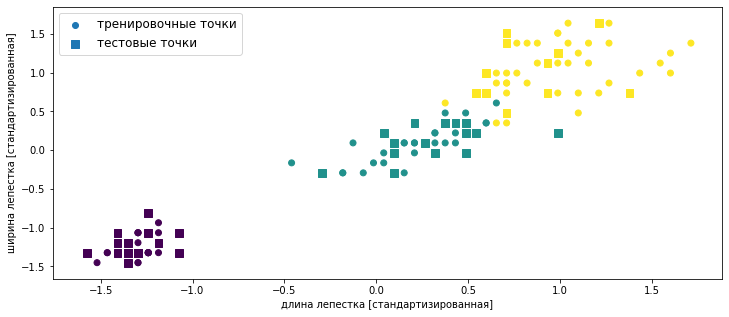

In [4]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10,
                                random_state=1,
                                n_jobs=2)
forest_model = forest.fit(X_train, y_train)
y_test_pred = forest_model.predict(X_test)
y_train_pred = forest_model.predict(X_train)
plt.figure(figsize=(12,5))
plt.scatter(X_train_std[:,0], X_train_std[:,1], 
            c=y_train_pred, marker='o', label='тренировочные точки')
plt.scatter(X_test_std[:,0], X_test_std[:,1], 
            c=y_test_pred, marker='s', s=60, label='тестовые точки')

plt.xlabel('длина лепестка [стандартизированная]')
plt.ylabel('ширина лепестка [стандартизированная]')
plt.legend(loc='upper left', prop={'size': 12})
plt.show()

In [5]:
print('Accuracy train_data: %.3f' % accuracy_score(y_train, y_train_pred))
print('Accuracy test_data: %.3f' % accuracy_score(y_test, y_test_pred))

Accuracy train_data: 0.990
Accuracy test_data: 0.956


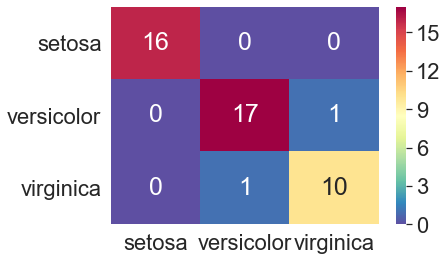

In [6]:
conf_scores = confusion_matrix(y_test, y_test_pred)
conf_df = pd.DataFrame(conf_scores, columns=ds_iris.target_names, index=ds_iris.target_names)
sns.set(font_scale=2)
sns.heatmap(conf_df, cmap='Spectral_r', annot=True, annot_kws={'size': 25})
plt.show()

## Случайный лес (задача регресии)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score


ds_boston = load_boston()
df = pd.DataFrame(ds_boston.data, columns = ds_boston.feature_names)
X = df.values
y = ds_boston.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [8]:
forest = RandomForestRegressor(criterion='mse',
                               n_estimators=1000,
                               random_state=1)
forest_model = forest.fit(X_train, y_train)
y_test_pred = forest_model.predict(X_test)
y_train_pred = forest_model.predict(X_train)

print('MSE train_data: %.2f, test_data: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train_data: %.3f, test_data: %.3f' % 
      (r2_score(y_train, y_train_pred),
       r2_score(y_test, y_test_pred)))

MSE train_data: 1.64, test_data: 11.06
R^2 train_data: 0.979, test_data: 0.878
